# 绘制网格图表

# 目录
+ Axis grids对象


+ 使用FacetGrid对数据选择子集
    + 生成FacetGrid对象并应用map方法
    + FacetGrid和map的参数
    + 分面的大小
    + 分面的顺序
    + hue层次的颜色
    + hue层次的其他元素
    + col_wrap
    + FacetGrid.set()
    + Figure和Axes对象


+ 将自编绘图函数映射至grid
    + 自编绘图函数示例
    + 修改Seaborn绘图函数


+ 使用PairGrid对象和pairplot()函数绘制成对关系图
    + PairGrid对象
        + 设置对角线图表的种类
        + hue层次的颜色
        + 选择绘制的变量
        + 对角线上方和下方绘制不同图表
        + x_vars参数、y_vars参数设置不同的变量
        + 设置图表的其他元素
    + sns.pairplot()方法
        + 设置图表的其他元素

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")

## Axis grids对象
+ FacetGrid  
Subplot grid for plotting conditional relationships.
+ PairGrid  
Subplot grid for plotting pairwise relationships in a dataset.
+ JointGrid  
Grid for drawing a bivariate plot with marginal univariate plots.

+ FacetGrid对象 + map方法、sns.factorplot() + kind参数  
第5章“绘制分面类别图”部分

+ PairGrid对象 + map方法、sns.pairplot() + kind参数  
第4章“多个变量相对于一个变量的回归线”部分

+ JointGrid对象 + map方法、sns.jointplot() + kind参数
第3章“JointGrid对象”部分

+ 绘制分面图，数据必须以Pandas DataFrame的"tidy data"形式存储，即每一列代表一个变量，每一行代表一个观测  


+ lmplot()、factorplot()生成FacetGrid对象，pairplot()生成PairGrid对象，jointplot()生成JointGrid对象

## 使用FacetGrid对数据选择子集
row、col、hue参数

### 生成FacetGrid对象并应用map方法

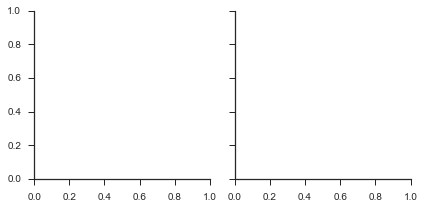

In [3]:
g = sns.FacetGrid(tips, col="time") # 生成FacetGrid对象，需要传入data、row、col、hue参数，等同于生成matplotlib的figure和axes，不会绘制任何图表

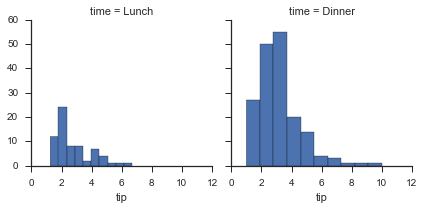

In [4]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip") # 传入plotting function以及需要绘制的变量名（字符串形式）

### FacetGrid和map的参数

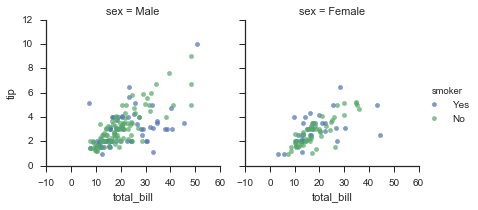

In [5]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7) # map中也可以传入其他plotting function的参数，如alpha
g.add_legend() # 添加图例

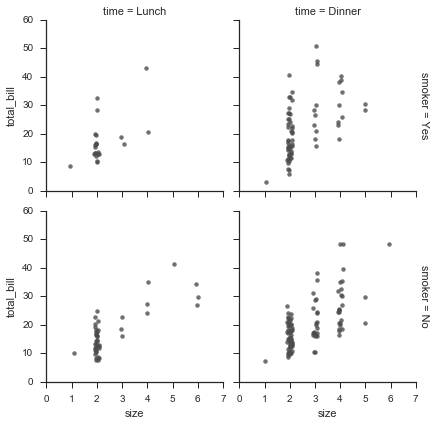

In [6]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True) # FacetGrid中还有很多参数可选，如margin_titles参数
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

### 分面的大小

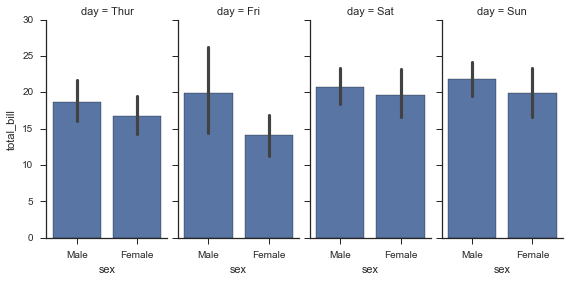

In [7]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5) # size、aspect参数控制每个分面的大小
g.map(sns.barplot, "sex", "total_bill")

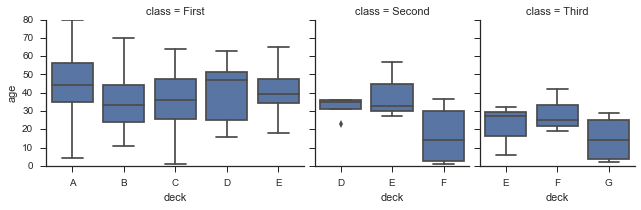

In [8]:
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")
# gridspec_kws参数，Dictionary of keyword arguments passed to matplotlib’s gridspec module (via plt.subplots)
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]}) # 当每个分面中图表的内容多少有区别时，最好把每个分面设置不同的大小
g.map(sns.boxplot, "deck", "age")

### 分面的顺序

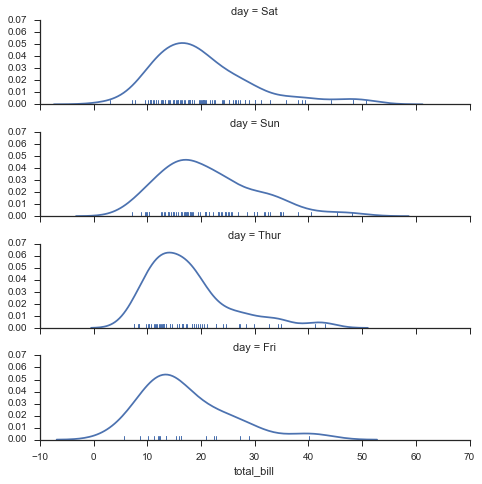

In [9]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,) # *_order设置分面的顺序，如没有设置该参数，则按照Categorical datatype的order，或者变量在DataFrame中出现的顺序
g.map(sns.distplot, "total_bill", hist=False, rug=True)

### hue层次的颜色
palette参数

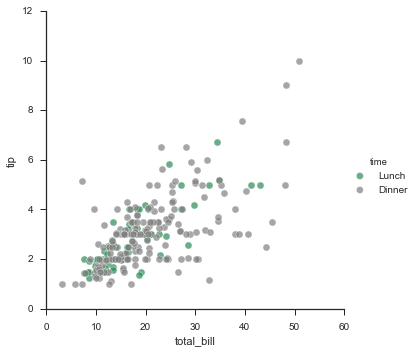

In [10]:
pal = dict(Lunch="seagreen", Dinner="gray") # 通过字典来设置颜色
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5) # palette可以接受任何能够被color_palette()接受的值，也可以接受一个hue:"col"的字典
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()

### hue层次的其他元素
hue_kws参数

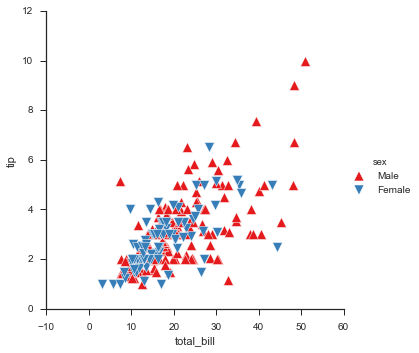

In [11]:
# hue_kws参数，接受"the names of plotting function keyword arguments": [lists of keyword values]形式的字典，如本例中的marker设置散点的形状
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

### col_wrap
col_wrap参数，此时row参数被禁用

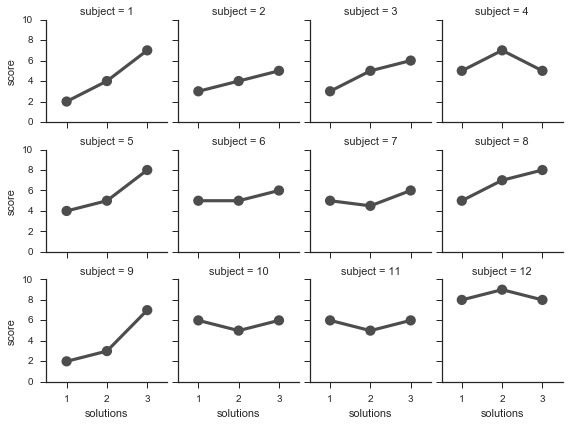

In [12]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None)

### FacetGrid.set()
还包含了FacetGrid.set_axis_labels()等一系列更为特定的方法

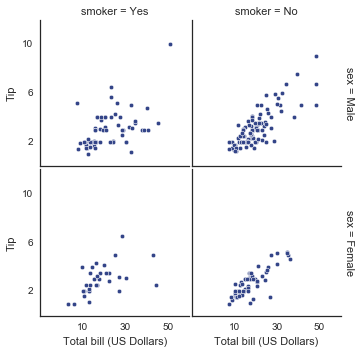

In [13]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Total bill (US Dollars)", "Tip") # 设置坐标轴标签
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]) # 设置坐标轴刻度
g.fig.subplots_adjust(wspace=.02, hspace=.02) # matplotlib中的方法

### Figure和Axes对象
For even more customization, you can  work directly with the underling matplotlib ``Figure`` and ``Axes`` objects, which are stored as member attributes at ``fig`` and ``axes`` (a two-dimensional array), respectively. When making a figure without row or column faceting, you can also use the ``ax`` attribute to directly access the single axes.

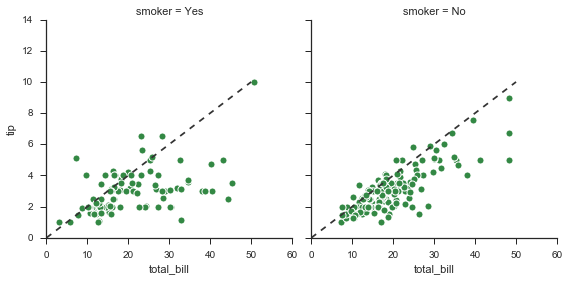

In [14]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat: # 获取ax对象
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--") # 绘制45度线
g.set(xlim=(0, 60), ylim=(0, 14))

## 将自编绘图函数映射至grid

自编函数的要求
+ It must plot onto the "currently active" matplotlib **Axes**. This will be true of functions in the **matplotlib.pyplot** namespace, and you can call **plt.gca** to get a reference to the current **Axes** if you want to work directly with its methods.


+ It must accept the data that it plots in positional arguments. Internally, **FacetGrid** will pass a **Series** of data for each of the named positional arguments passed to **FacetGrid.map**.


+ It must be able to accept **color** and **label** keyword arguments, and, ideally, it will do something useful with them. In most cases, it's easiest to catch a generic dictionary of **\*\*kwargs** and pass it along to the underlying plotting function.

### 自编绘图函数示例

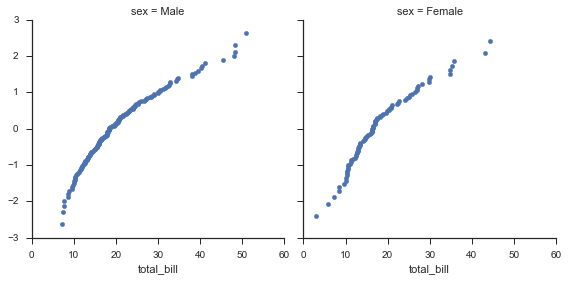

In [15]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    
g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill")

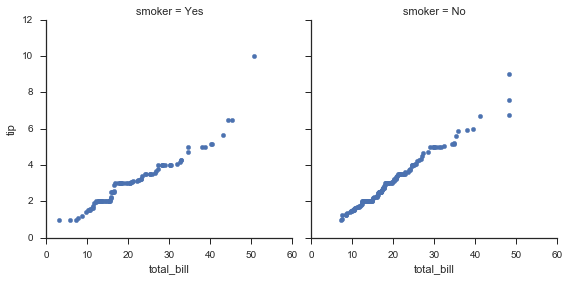

In [16]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    
g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip")

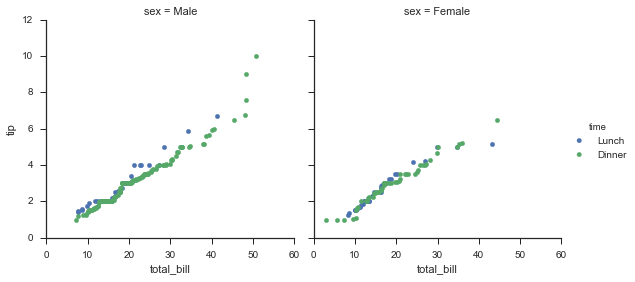

In [17]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

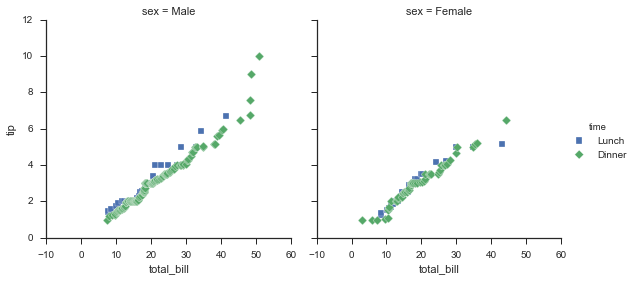

In [18]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend()

### 修改Seaborn绘图函数
Sometimes, though, you'll want to map a function that doesn't work the way you expect with the **color** and **label** keyword arguments. In this case, you'll want to explictly catch them and handle them in the logic of your custom function. For example, this approach will allow use to map **plt.hexbin**, which otherwise does not play well with the **FacetGrid** API

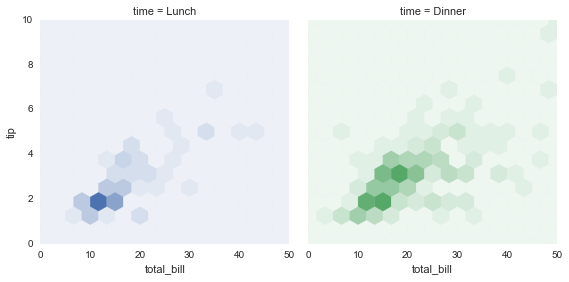

In [19]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])

## 使用PairGrid对象和pairplot()函数绘制成对关系图
在PairGrid中，每一行、列都赋予不同的变量，因而可以展示变量之间的两两关系

### PairGrid对象

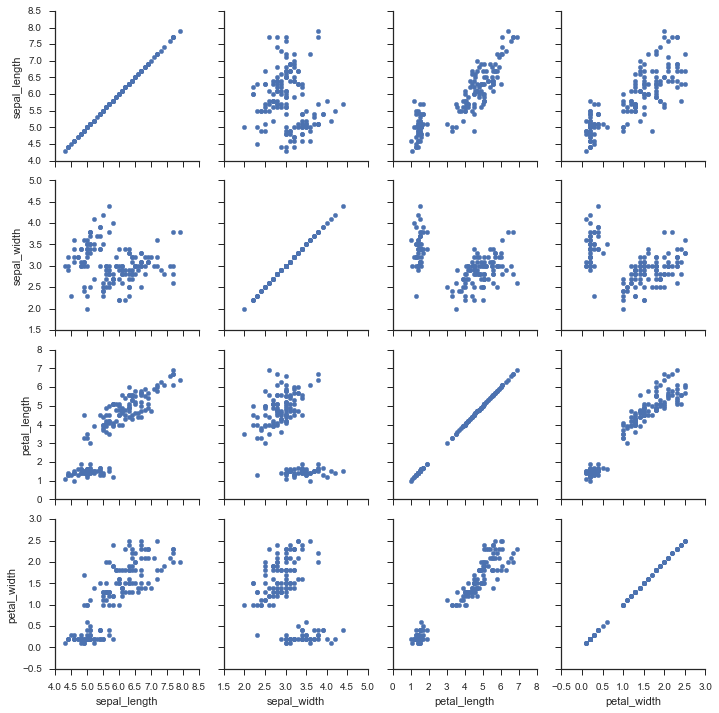

In [20]:
g = sns.PairGrid(iris)
g.map(plt.scatter) # 绘制成对散点图，对角线上默认绘制散点图

#### 设置对角线图表的种类
map_diag()、map_offdiag()方法

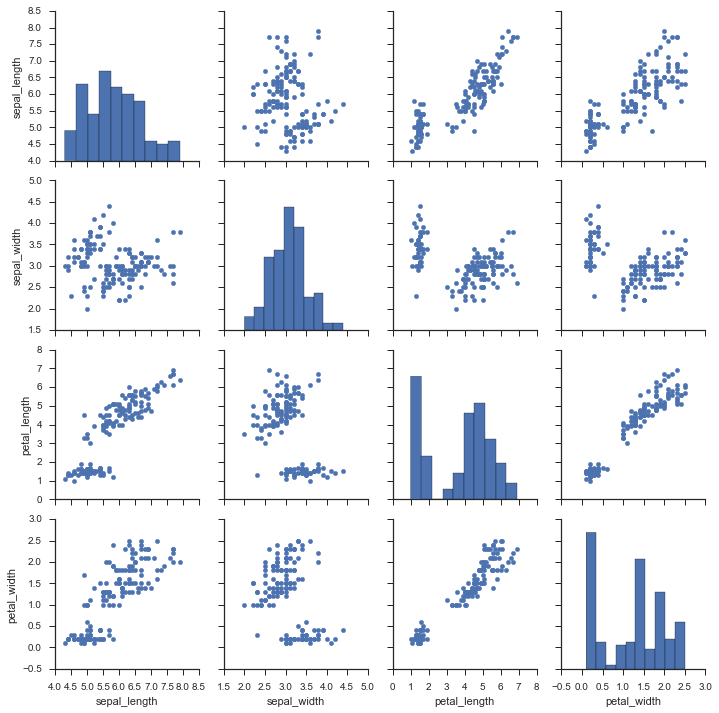

In [21]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist) # 可以在对角线上绘制直方图或核密度图，但是坐标轴与直方图的count、核密度图的density不对应
g.map_offdiag(plt.scatter) # 在非对角线上绘制成对散点图

#### hue层次的颜色

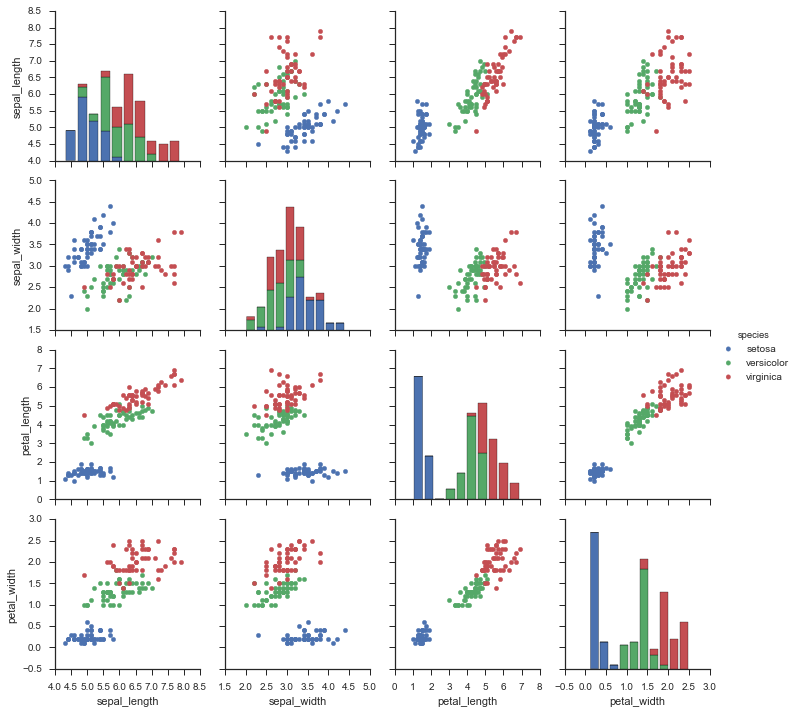

In [22]:
g = sns.PairGrid(iris, hue="species") # 设置hue参数，对不同类别的观测点绘制不同颜色
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

#### 选择绘制的变量
vars参数

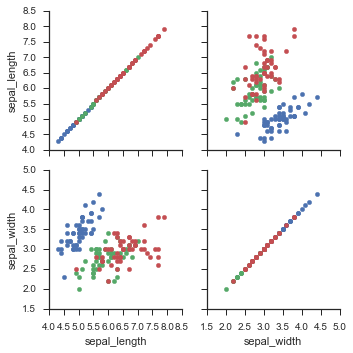

In [23]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species") # 默认绘制data数据集中的所有变量，设置vars参数，绘制部分变量
g.map(plt.scatter)

#### 对角线上方和下方绘制不同图表
map_upper()、map_lower()方法

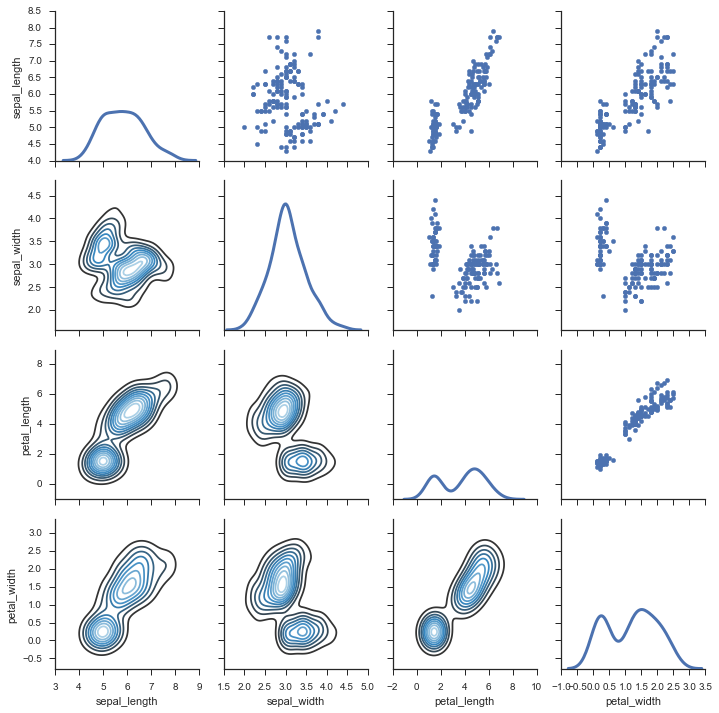

In [24]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False)

#### x_vars参数、y_vars参数设置不同的变量

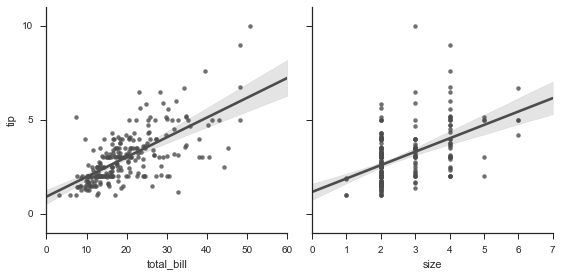

In [25]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

#### 设置图表的其他元素
PairGrid方法和map方法中有一系列参数可供设置

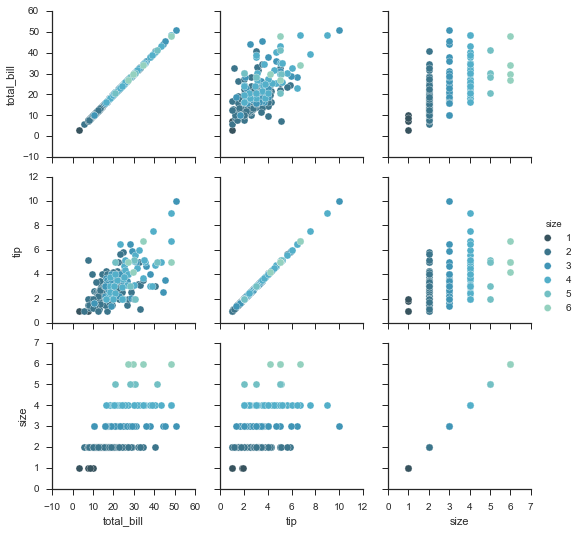

In [26]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

### sns.pairplot()方法
默认绘制散点图和直方图，非对角线可绘制回归线，对角线可绘制核密度图

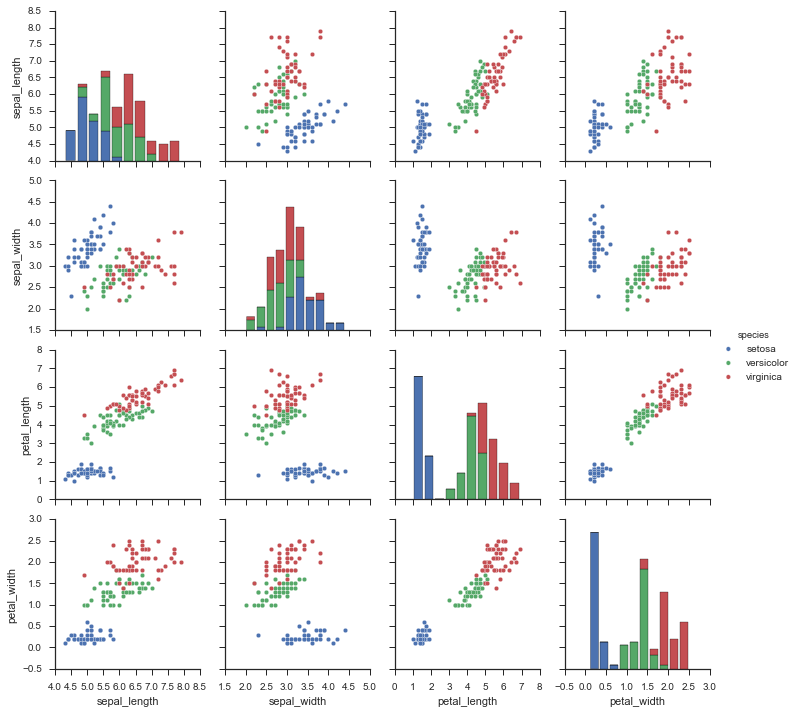

In [27]:
sns.pairplot(iris, hue="species", size=2.5)

#### 设置图表的其他元素

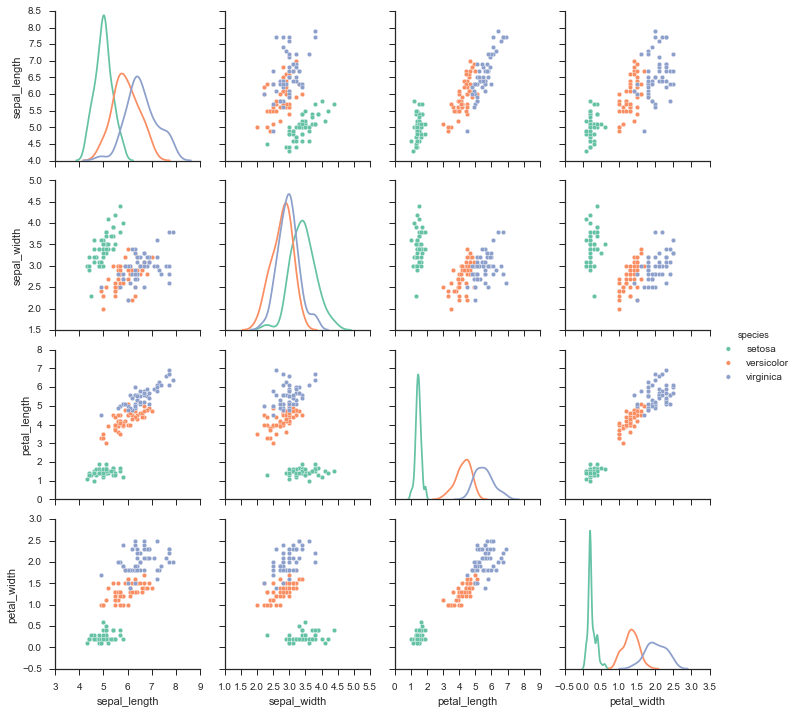

In [28]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)